<a href="https://colab.research.google.com/github/archanags001/tensorflow/blob/main/Happy_or_sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, losses

In [2]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
# "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip"

--2022-04-01 21:56:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘happy-or-sad.zip’

happy-or-sad.zip    100%[===================>]   2.55M  --.-KB/s    in 0.03s   

2022-04-01 21:56:05 (78.1 MB/s) - ‘happy-or-sad.zip’ saved [2670333/2670333]



In [3]:
# Unzip the dataset
local_zip = './happy-or-sad.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./happy_or_sad')
zip_ref.close()

Sample happy image: 


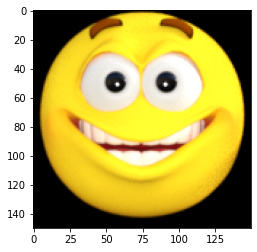


Sample sad image: 


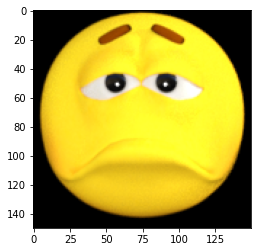

In [4]:
happy_dir = './happy_or_sad/happy/'
sad_dir = './happy_or_sad/sad/'

print("Sample happy image: ")
plt.imshow(load_img(f"{os.path.join(happy_dir,os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image: ")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

In [9]:
# Load the first example of happy face
sample_image = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")
print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (150, 150, 3)
The maximum pixel value used is: 255.0


In [43]:
# class myCallback(Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if logs.get('accuracy') is not None and logs.get('accuracy') >0.999:
#       print("\nReached 99.9% accuracy so cancelling training")
#       self.model.stop_taining = True

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True


In [13]:
# Image generator function

def image_generator():
  train_datagen = ImageDataGenerator(rescale=1/255)
  train_generator = train_datagen.flow_from_directory(directory='./happy_or_sad/',
                                                      target_size=(150,150),
                                                      batch_size=10,
                                                      class_mode='binary')
  return train_generator



In [40]:
# Save generator in a variable
gen = image_generator()
callbacks = myCallback()

Found 80 images belonging to 2 classes.


In [36]:
# Train happy_sad model
def train_happy_sad_model(train_generator):
  # Instantiate the callback
  callbacks = myCallback()
  model = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(512, activation='relu'),
                                     tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

  # model.compile(losses='binary_crossentropy',
  #               optimizer=optimizers.RMSprop(learning_rate=0.001),
  #               metrics=['accuracy']
  #               )
  
  history = model.fit(x=train_generator,
                      epochs=15,
                      callbacks=callbacks)
  
  return history


In [41]:
hist = train_happy_sad_model(gen)

Epoch 1/15
8/8 [==============================] - 3s 260ms/step - loss: 1.6212 - accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 2s 261ms/step - loss: 0.4828 - accuracy: 0.7500
Epoch 3/15
8/8 [==============================] - 2s 267ms/step - loss: 0.1898 - accuracy: 0.9375
Epoch 4/15
8/8 [==============================] - 2s 269ms/step - loss: 0.0957 - accuracy: 0.9875
Epoch 5/15
8/8 [==============================] - 2s 264ms/step - loss: 0.0424 - accuracy: 0.9875
Epoch 6/15
8/8 [==============================] - 2s 261ms/step - loss: 0.0571 - accuracy: 0.9750
Epoch 7/15
8/8 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 1.0000
Reached 95% accuracy so cancelling training!
8/8 [==============================] - 2s 266ms/step - loss: 0.0171 - accuracy: 1.0000


In [42]:
print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")

Your model reached the desired accuracy after 7 epochs
